In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#Let's supress warning to make it look beatiful
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the csv dataset from
df = pd.read_csv(r'C:\Users\Sandy\Desktop\Python\adult.csv', keep_default_na=True, na_values=['?'])

In [3]:
# Check if the data is loaded 
df.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [4]:
# Statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
#Analyze data a bit
print("# of training samples:"+ str(df.shape[0]))
print("# of attributes (including the label):"+ str(df.shape[1]))
print(df.columns)

# of training samples:32561
# of attributes (including the label):15
Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')


In [6]:
#Identify columns with missing values
missing_val_columns_before=df.columns[df.isnull().any()]

for col in missing_val_columns_before: 
    print ("\n"+col+"\n-----")
    print(df[col].value_counts(dropna=False))
   


workclass
-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

occupation
-----
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

native.country
-----
United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Sal

In [7]:
# Imputation: Fix missing columns
#from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#For each missing-value columns take actions based on data types
for col in missing_val_columns_before: 
    if is_numeric_dtype(df[col]) :
       #Fill by mean of this column
       df[col].fillna(df[col].mean(), inplace=True)
    else:
        #Fill by mode of this column
        df[col].fillna(df[col].mode()[0], inplace=True)
    

In [8]:
#Verify the fix of missing values. We expect the mode value count to increse by earlier 'NaN' count
for col in missing_val_columns_before: 
    print ("\n"+col+"\n-----")
    print(df[col].value_counts(dropna=False))


workclass
-----
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

occupation
-----
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

native.country
-----
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                  

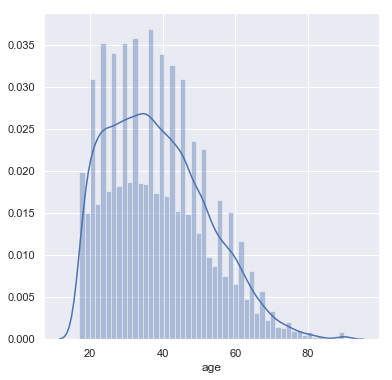

In [9]:
#Visualize
plot_age = sns.distplot(df.age)
plot_age.figure.set_size_inches(6,6)


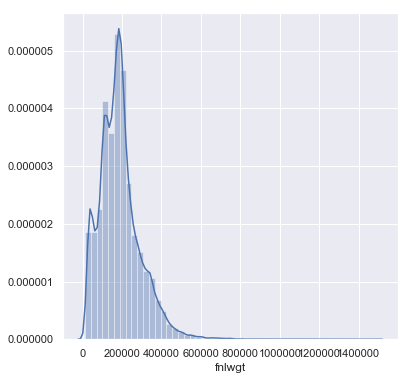

In [10]:
plot = sns.distplot(df.fnlwgt)
plot.figure.set_size_inches(6,6)

In [11]:
TARGET_COLUMN='income'
categorical_columns=df.select_dtypes(include=['object', 'category']).columns.values.tolist()
categorical_columns.remove(TARGET_COLUMN)

numerical_columns=df.columns.copy().difference(categorical_columns).tolist()
numerical_columns.remove(TARGET_COLUMN)
print (numerical_columns)
print("-------")
print(categorical_columns)

#print(categorical_columns)
#print("------\n")
#print(df.columns)

['age', 'capital.gain', 'capital.loss', 'education.num', 'fnlwgt', 'hours.per.week']
-------
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [12]:
#One hot encode
dummies = pd.get_dummies(df[categorical_columns])
#drop original categorical columns
df.drop(df[categorical_columns], axis=1, inplace=True)
#print("------\n")
#print(len(dummies.columns))
df = pd.concat([df, dummies], axis=1)
#print("------\n")
#print(len(df.columns))

In [13]:
#Split dataframe into features (X) and label (Y)
X = df.drop(TARGET_COLUMN, 1)
Y = df[TARGET_COLUMN]
print(df.shape)
print(X.shape)
print(Y.shape)

(32561, 106)
(32561, 105)
(32561L,)


In [14]:
#Split the data into training (to learn hypotheses) and testing set (to obtain accurcy)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

print(X_test.shape)
print(Y_test.shape)

(8141, 105)
(8141L,)


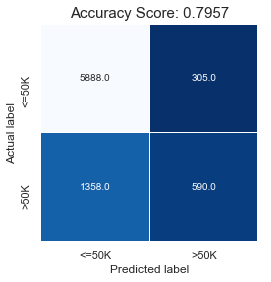

In [15]:
#Train with Gaussian Naive Bayesian and plot confusion matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
#print(Y_pred)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
cm=metrics.confusion_matrix(Y_test,Y_pred)
#print(cm)

target_labels=sorted(df[TARGET_COLUMN].unique())
#print(target_labels)
df_cm = pd.DataFrame(cm, index=target_labels, columns=target_labels)

# heatmap=sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False) #viridis
# heatmap.xaxis.set_ticks_position('top')
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)
plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cbar=False, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(metrics.accuracy_score(Y_test, Y_pred))
plt.title(all_sample_title, size = 15);

In [16]:
from sklearn.ensemble import RandomForestClassifier

def get_top_n_feature (X_data,Y_data, n):
    #Create a Gaussian Classifier
    rfc=RandomForestClassifier(n_estimators=100)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    rfc.fit(X_data,Y_data)
    
    feature_imp = pd.Series(rfc.feature_importances_,index=X_data.columns).sort_values(ascending=False)
    #print(feature_imp[:2*n])
    top_n_features=feature_imp.index[:n]
    #print(top_n_features)
    return top_n_features



In [17]:
#Defining plot functions 

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
    
#plot_decision_boundary(X_test,top_2_features,Y_test,Y_Predicted)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import scipy

def plot_decision_boundary (feature_data, top_2_features, label_data, label_data_pred):
    y1_color='gold'  #'blue'
    y2_color='orangered'
    boundary_color='deepskyblue'
    PLOT_TITLE='Decision Boundary by top-two features'

    x1 = feature_data[top_2_features[0]]  #np.random.rand(N)
    x2 = feature_data[top_2_features[1]] 
    y =  label_data
    y_pred = label_data_pred
    
    # For testing used 10000 iterations only, need to change it during Prod run 
    indx=10000
    for x1, x2, y, y_pred in zip(x1,x2,y, y_pred):
        indx=indx-1
        if indx == 0:
            break
        
        c=y1_color  
        if y=='>50K':
            c=y2_color  
      
        
        if y==y_pred:
            plt.scatter(x1, x2, color=boundary_color, label=y, alpha=0.2, s=208)
    
        plt.scatter(x1, x2, color=c, label=y, alpha=1, s=24)
    #End of plotting main data
    
    plt.title(PLOT_TITLE)
    
    #Make Legend
    red_patch = mpatches.Patch(color=y1_color, label='<=50K')
    red1_patch = mpatches.Patch(color=y2_color, label='>50K')
    red2_patch = mpatches.Patch(color=boundary_color, label='Decision boundary') #TODO can we make a line legend


    plt.legend(handles=[red_patch,red1_patch,red2_patch], loc='best')

    plt.xlabel(top_2_features[0])
    plt.ylabel(top_2_features[1])
    plt.show()
    
    #function ends
    

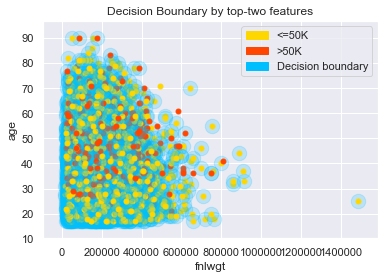

In [18]:
top_2_features=get_top_n_feature(X_train,Y_train, 2)
#plot_decision_boundary(X_test,top_2_features,Y_test )
plot_decision_boundary(X_test,top_2_features,Y_test, Y_pred )

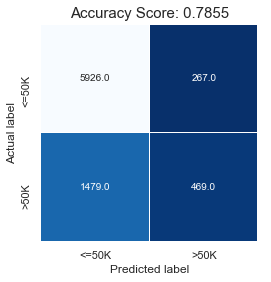

In [19]:
#Train with Multinomial Naive Bayesian and plot confusion matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Create a Gaussian Classifier
model = MultinomialNB()
model.fit(X_train,Y_train)
Y_pred_MNB = model.predict(X_test)
#print(Y_pred)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_MNB))
cm_MNB=metrics.confusion_matrix(Y_test,Y_pred_MNB)
#print(cm)

target_labels=sorted(df[TARGET_COLUMN].unique())
#print(target_labels)
df_cm_MNB = pd.DataFrame(cm_MNB, index=target_labels, columns=target_labels)

# heatmap_MNB=sns.heatmap(df_cm_MNB, annot=True, fmt="d", cmap="YlGnBu", cbar=False) #viridis
# heatmap_MNB.xaxis.set_ticks_position('top')
# heatmap_MNB.yaxis.set_ticklabels(heatmap_MNB.yaxis.get_ticklabels(), rotation=0)

plt.figure(figsize=(4,4))
sns.heatmap(df_cm_MNB, annot=True, fmt=".1f", linewidths=.5, square = True, cbar=False, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(metrics.accuracy_score(Y_test,Y_pred_MNB))
plt.title(all_sample_title, size = 15);

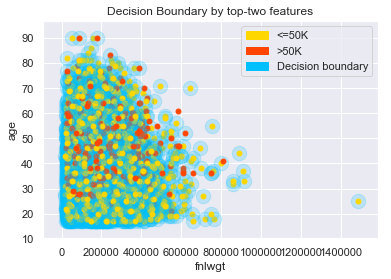

In [20]:
#Decision boundary for MultinomialNB
plot_decision_boundary(X_test,top_2_features,Y_test, Y_pred_MNB )